## 7.12.2023

Compositional analysis of the COPD-IAV scRNA dataset using scCoda (pertpy):

6 Patients with and 6 without chronic obstructive pulmonary disease (COPD).
Epithelial cells extracted with a lung wash and exposed to IAV (Control and IAV n=3 for both COPD and healthy patients)
--> scRNA-seq and cell types annotated

Created mamba environment in /Users/egerc/miniforge3/envs/pertpy-env
$ mamba create -n pertpy-env python=3.10
$ mamba activate pertpy-env

In [3]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import scanpy as sc
import numpy as np
#import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import pertpy as pt
import rpy2

In [4]:
sc.logging.print_versions()

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                         10.1.0
absl                        NA
adjustText                  0.8
aiohttp                     3.9.1
aiosignal                   1.3.1
altair                      5.2.0
annotated_types             0.6.0
anyio                       NA
appnope                     0.1.3
arrow                       1.3.0
arviz                       0.16.1
asttokens                   NA
async_timeout               4.0.3
attr                        23.1.0
attrs                       23.1.0
backoff                     2.2.1
bs4                         4.12.2
certifi                     2023.11.17
charset_normalizer          3.3.2
chex                        0.1.7
click                       8.1.7
comm                        0.1.4
contextlib2                 NA
croniter                    NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.8.2
debugpy 

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [5]:
adata = sc.read_h5ad("Marburg_cell_states_locked_scANVI_ctl230901.raw.h5ad")
print(adata)
#adata object created from the annotated h5ad file.

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'


In [6]:
adata.obs

,sex,age,ethnicity,PaCO2,donor,infection,disease,SMK,illumina_stimunr,bd_rhapsody,...,group,Viral_score,cell_type,cell_states,leiden,cell_compartment,seed_labels,_scvi_batch,_scvi_labels,C_scANVI
493638-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-0.993291,ciliated,OMG+Ciliated,MultiC_0,Ciliated,Ciliated,0,1,Ciliated
816750-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.685051,ciliated,APOD+Ciliated,MultiC_1,Ciliated,Ciliated,0,1,Ciliated
678000-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-0.506433,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Ciliated
247802-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.299193,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club
177433-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.502644,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097861-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-2.114714,mixed,IGFBP6+Basal,Mixed_7,Basal,Basal,0,0,Basal
7239232-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-3.002878,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB
5330709-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-2.085706,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB
1638545-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-1.008348,mixed,SERPINE1+Basal,Mixed_3,Basal,Basal,0,0,Basal


In [42]:
adata.obs["infectionANDdisease"] = adata.obs["infection"].str.cat(adata.obs["disease"], sep = "&")
adata.obs
#creating a new obs based on adding obs infection and obs disease --> CTRL&COPD, IAV&COPD, CTRL&healthy, IAV&healthy

,sex,age,ethnicity,PaCO2,donor,infection,disease,SMK,illumina_stimunr,bd_rhapsody,...,cell_states,leiden,cell_compartment,seed_labels,_scvi_batch,_scvi_labels,C_scANVI,infection&disease,scCODA_sample_id,infectionANDdisease
493638-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,OMG+Ciliated,MultiC_0,Ciliated,Ciliated,0,1,Ciliated,CTRLandhealthy,ST07_CSE_CTRL,CTRL&healthy
816750-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,APOD+Ciliated,MultiC_1,Ciliated,Ciliated,0,1,Ciliated,CTRLandhealthy,ST07_CSE_CTRL,CTRL&healthy
678000-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,TCN1+Club,MultiC_3,Club,Club,0,2,Ciliated,CTRLandhealthy,ST07_CSE_CTRL,CTRL&healthy
247802-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,TCN1+Club,MultiC_3,Club,Club,0,2,Club,CTRLandhealthy,ST07_CSE_CTRL,CTRL&healthy
177433-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,TCN1+Club,MultiC_3,Club,Club,0,2,Club,CTRLandhealthy,ST07_CSE_CTRL,CTRL&healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097861-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,IGFBP6+Basal,Mixed_7,Basal,Basal,0,0,Basal,IAVandCOPD,CSE03_IAV,IAV&COPD
7239232-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB,IAVandCOPD,CSE03_IAV,IAV&COPD
5330709-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB,IAVandCOPD,CSE03_IAV,IAV&COPD
1638545-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,SERPINE1+Basal,Mixed_3,Basal,Basal,0,0,Basal,IAVandCOPD,CSE03_IAV,IAV&COPD


In [44]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="batch",
    covariate_obs=["infection", "disease", "infectionANDdisease"],
)
sccoda_data

MuData object with n_obs × n_vars = 97597 × 27213
  2 modalities
    rna:	97573 x 27208
      obs:	'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'infection&disease', 'scCODA_sample_id', 'infectionANDdisease'
      var:	'mt', 'ribo'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	24 x 5
      obs:	'infection', 'disease', 'infectionANDdisease', 'batch'
      var:	'n_cells'

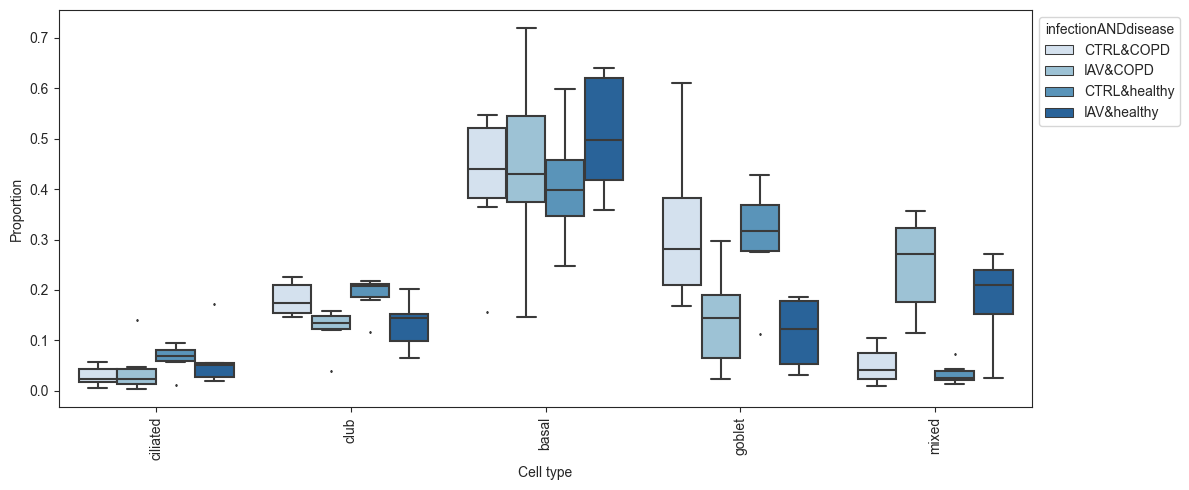

In [45]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="infectionANDdisease",
    figsize=(12, 5),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.show()

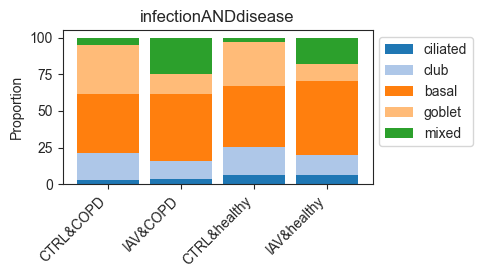

In [46]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="infectionANDdisease", figsize=(4, 2)
)
plt.show()

## 11.12.23

Function sccoda.run_nuts() broken at the moment
https://github.com/theislab/pertpy/issues/454
Downgrading Jax didn't solve the issue for me.

--> solution: completely new environment, install jax=0.4.20 prior to installing pertpy

In [47]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="infectionANDdisease",
    reference_cell_type="automatic",
)
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

Automatic reference selection! Reference cell type set to club

sample: 100%|██████████| 11000/11000 [00:47<00:00, 229.95it/s, 255 steps of size 1.55e-02. acc. prob=0.90]


for formula in sccoda_model.prepare can't use "&", therefore replaced with &

In [49]:
sccoda_data["coda"].varm["effect_df_infectionANDdisease[T.IAV&COPD]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
ciliated,0.000000,-0.981,0.365,0.242,0.3616,196.332323,-0.228914
club,0.000000,0.000,0.000,0.000,0.0000,589.225375,-0.228914
basal,0.000000,-0.426,0.575,0.134,0.2721,1469.692907,-0.228914
goblet,0.000000,-1.278,0.001,0.381,0.9029,977.314741,-0.228914
mixed,1.259196,0.569,1.962,0.378,0.9919,832.976320,1.587722


In [50]:
sccoda_data

MuData object with n_obs × n_vars = 97597 × 27213
  2 modalities
    rna:	97573 x 27208
      obs:	'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'infection&disease', 'scCODA_sample_id', 'infectionANDdisease'
      var:	'mt', 'ribo'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	24 x 5
      obs:	'infection', 'disease', 'infectionANDdisease', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_infectionANDdisease[T.CTRL&healthy]', 'effect_df_infectionANDdisease[T.IAV&COPD]', 'effect_df_infectionANDdisease[T.IAV&healthy]'

In [51]:
sccoda_model.set_fdr(sccoda_data, 0.2)

In [52]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate                            Cell Type
infectionANDdisease[T.CTRL&healthy]  ciliated     False
                                     club         False
                                     basal        False
                                     goblet       False
                                     mixed         True
infectionANDdisease[T.IAV&COPD]      ciliated     False
                                     club         False
                                     basal        False
                                     goblet        True
                                     mixed         True
infectionANDdisease[T.IAV&healthy]   ciliated     False
                                     club         False
                                     basal        False
                                     goblet        True
                                     mixed         True
Name: Final Parameter, dtype: bool

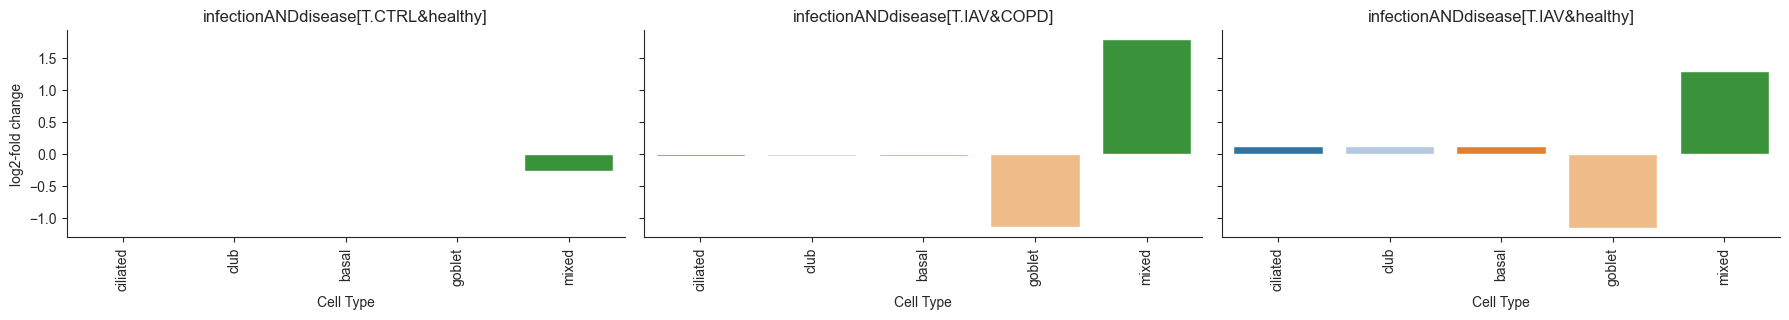

In [53]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "infection")
plt.show()